In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [23]:
data = pd.read_csv('../data/superstore_cleaned.csv')

In [24]:
data.head()

,Order Date,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,2015-01-03,CA-2015-103800,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
1,2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
2,2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
3,2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
4,2015-01-05,CA-2015-141817,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


In [25]:
data.isnull().sum()

Order Date       0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [26]:
data.describe()

,Postal Code,Sales
count,9800.000000,9800.000000
mean,55217.343265,230.769059
std,32066.750532,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,57551.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [28]:
data['Order Date'] = pd.to_datetime(data['Order Date']) 
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9800 non-null   datetime64[ns]
 1   Order ID       9800 non-null   object        
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [31]:
print('Order Date Description\n') 
print(data['Order Date'].describe())
print('\nShip Date Description\n')
print(data['Ship Date'].describe())

Order Date Description

count                             9800
mean     2017-05-01 05:13:51.673469440
min                2015-01-03 00:00:00
25%                2016-05-24 00:00:00
50%                2017-06-26 00:00:00
75%                2018-05-15 00:00:00
max                2018-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count                             9800
mean     2017-05-05 04:17:52.653061120
min                2015-01-07 00:00:00
25%                2016-05-27 18:00:00
50%                2017-06-29 00:00:00
75%                2018-05-19 00:00:00
max                2019-01-05 00:00:00
Name: Ship Date, dtype: object


In [32]:
data.sort_values(by='Order Date', inplace=True, ascending=True)
data.set_index('Order Date', inplace=True)

In [34]:
sales_data = pd.DataFrame(data['Sales'])

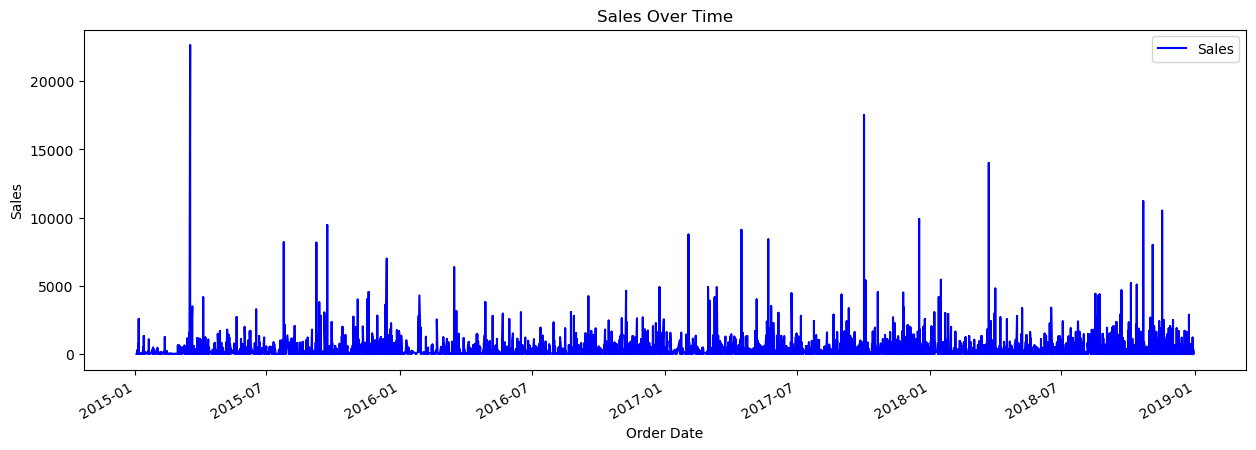

In [ ]:
sales_data.plot(figsize=(15, 5), title='Sales Over Time', color='blue')

plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

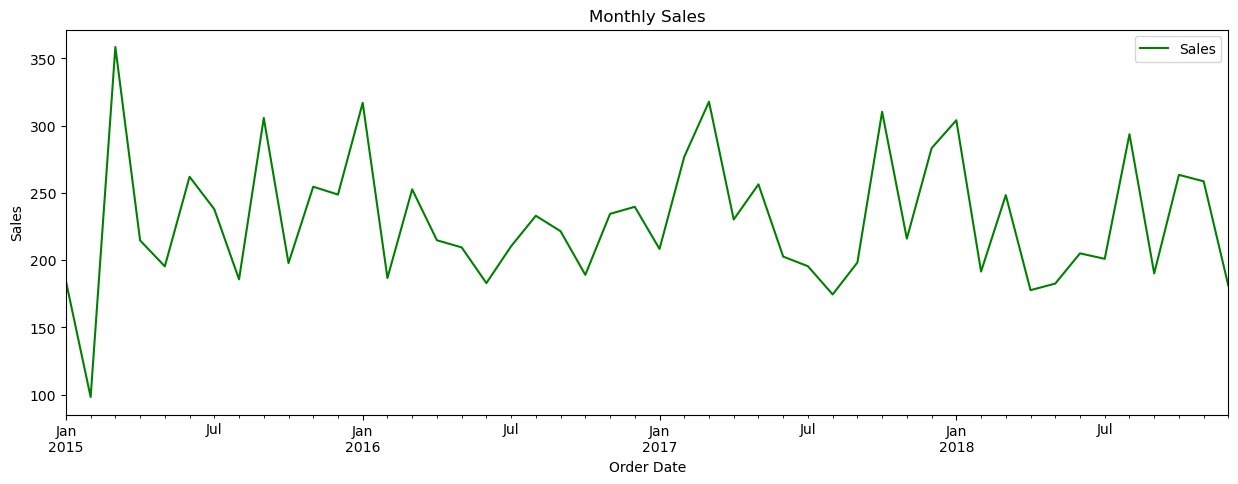

In [37]:
sales_data.resample('ME').mean().plot(figsize=(15, 5), title='Monthly Sales', color='green')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()